# K-Means Clustering Algorithm - Mall Customer Segmentation

## Overview
This notebook implements K-Means clustering to segment mall customers based on their demographics and spending behavior. Customer segmentation helps businesses understand their customer base and develop targeted marketing strategies.

## Dataset Information
- **Source**: Mall Customer Dataset
- **Features**: CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)
- **Task**: Unsupervised Learning - Customer Segmentation
- **Samples**: 200 customers

## K-Means Clustering Advantages
- **Simplicity**: Easy to understand and implement
- **Efficiency**: Computationally efficient for large datasets
- **Scalability**: Works well with multiple features
- **Interpretability**: Clear cluster centers and assignments
- **Business Applications**: Perfect for customer segmentation and market analysis


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load and explore the dataset
print("=== Data Loading and Exploration ===")

# Load the mall customers dataset
data_path = '../datasets/Mall_Customers.csv'
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nDataset Info:")
print(df.info())

print(f"\nFirst 10 rows:")
df.head(10)


=== Data Loading and Exploration ===
Dataset loaded successfully!
Shape: (200, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First 10 rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


=== Dataset Statistics and Exploration ===
Dataset shape: (200, 5)
Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dataset description:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Column names:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$

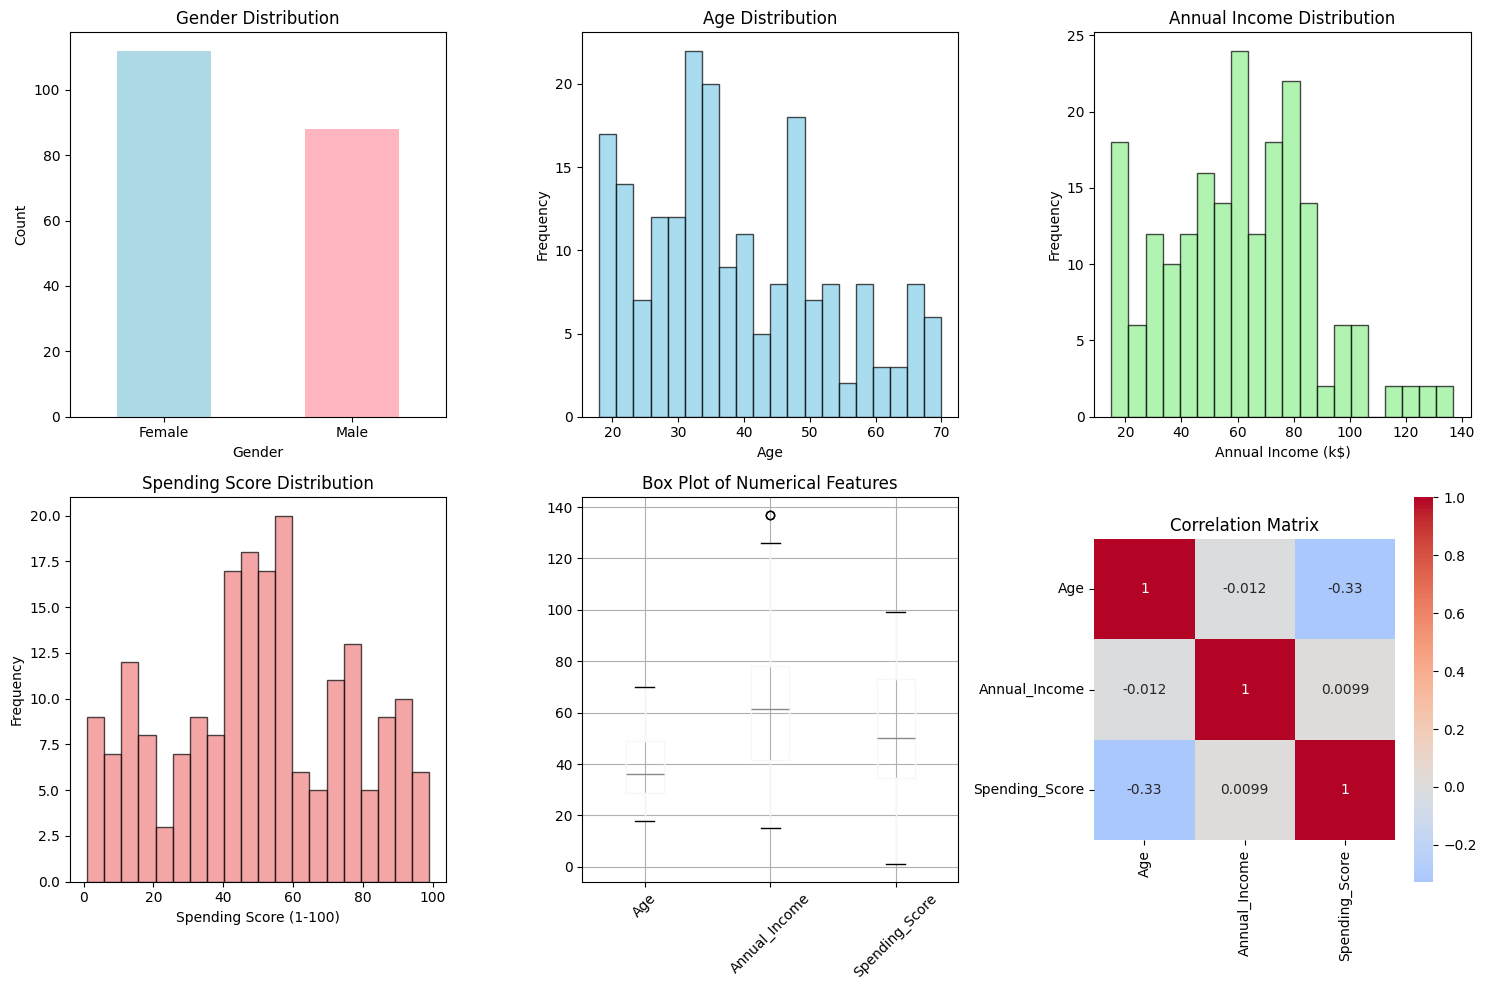


Dataset contains 200 customers with 4 features for clustering


In [3]:
# Basic dataset statistics and exploration
print("=== Dataset Statistics and Exploration ===")

# Basic statistics
print(f"Dataset shape: {df.shape}")
print(f"Missing values per column:")
print(df.isnull().sum())

print(f"\nDataset description:")
print(df.describe())

# Check column names and rename for easier handling
print(f"\nColumn names:")
print(df.columns.tolist())

# Rename columns for easier handling
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']
print(f"\nRenamed columns: {df.columns.tolist()}")

# Explore categorical variables
print(f"\nGender distribution:")
print(df['Gender'].value_counts())
print(f"\nGender percentage:")
print(df['Gender'].value_counts(normalize=True) * 100)

# Visualize basic distributions
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df['Gender'].value_counts().plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(2, 3, 2)
plt.hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df['Annual_Income'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(df['Spending_Score'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
df.boxplot(column=['Age', 'Annual_Income', 'Spending_Score'], ax=plt.gca())
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
correlation_matrix = df[['Age', 'Annual_Income', 'Spending_Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

print(f"\nDataset contains {len(df)} customers with {len(df.columns)-1} features for clustering")


=== Feature Relationships Analysis ===


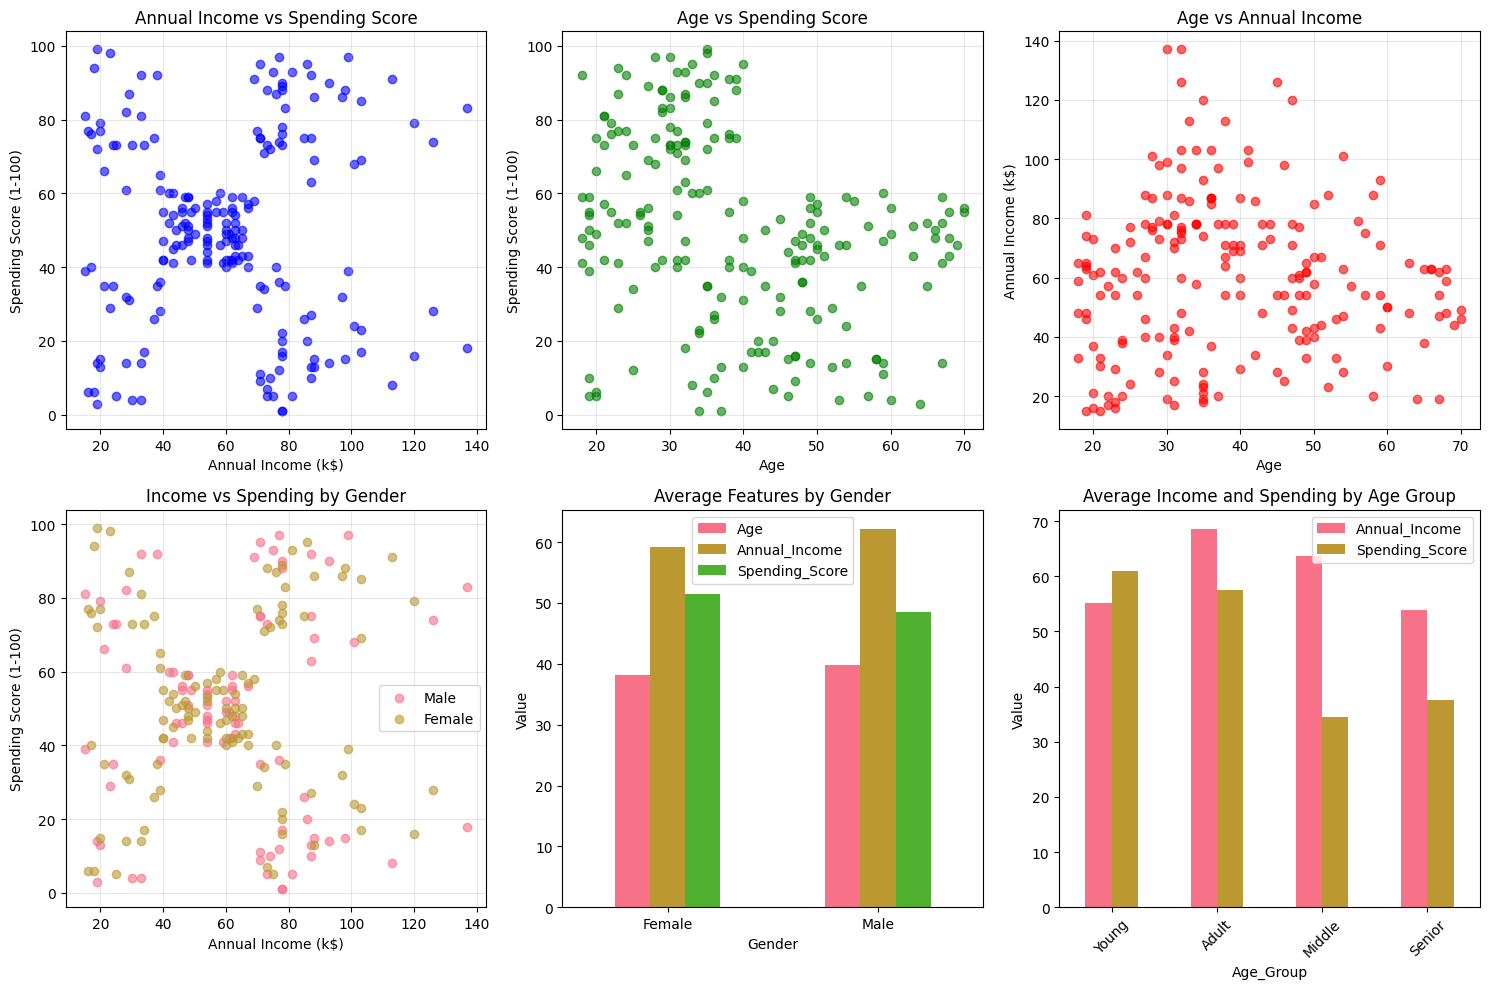


Data Insights:
Age range: 18 - 70 years
Income range: 15 - 137 k$
Spending score range: 1 - 99

Average values by gender:
              Age  Annual_Income  Spending_Score
Gender                                          
Female  38.098214      59.250000       51.526786
Male    39.806818      62.227273       48.511364


In [4]:
# Explore relationships between features
print("=== Feature Relationships Analysis ===")

# Create scatter plots to understand relationships
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(df['Annual_Income'], df['Spending_Score'], alpha=0.6, c='blue')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.scatter(df['Age'], df['Spending_Score'], alpha=0.6, c='green')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
plt.scatter(df['Age'], df['Annual_Income'], alpha=0.6, c='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income')
plt.grid(True, alpha=0.3)

# Gender-based analysis
plt.subplot(2, 3, 4)
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Annual_Income'], subset['Spending_Score'], 
               label=gender, alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending by Gender')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
df.groupby('Gender')[['Age', 'Annual_Income', 'Spending_Score']].mean().plot(kind='bar', ax=plt.gca())
plt.title('Average Features by Gender')
plt.ylabel('Value')
plt.xticks(rotation=0)

plt.subplot(2, 3, 6)
# Age groups analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 100], labels=['Young', 'Adult', 'Middle', 'Senior'])
df.groupby('Age_Group')[['Annual_Income', 'Spending_Score']].mean().plot(kind='bar', ax=plt.gca())
plt.title('Average Income and Spending by Age Group')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print insights about the data
print(f"\nData Insights:")
print(f"Age range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"Income range: {df['Annual_Income'].min()} - {df['Annual_Income'].max()} k$")
print(f"Spending score range: {df['Spending_Score'].min()} - {df['Spending_Score'].max()}")

print(f"\nAverage values by gender:")
print(df.groupby('Gender')[['Age', 'Annual_Income', 'Spending_Score']].mean())


## Data Preprocessing

I'll prepare the data for K-Means clustering by handling categorical variables and scaling the features.


In [5]:
# Data preprocessing for clustering
print("=== Data Preprocessing ===")

# Create a copy for preprocessing
df_processed = df.copy()

# Handle categorical variable (Gender)
print(f"Encoding categorical variable...")
label_encoder = LabelEncoder()
df_processed['Gender_Encoded'] = label_encoder.fit_transform(df_processed['Gender'])

print(f"Gender encoding: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

# Select features for clustering
# We'll use different feature combinations to find the best clustering approach
print(f"\nFeature selection strategies:")

# Strategy 1: All numerical features
features_all = ['Age', 'Annual_Income', 'Spending_Score', 'Gender_Encoded']
X_all = df_processed[features_all]

# Strategy 2: Only Income and Spending Score (most common for customer segmentation)
features_income_spending = ['Annual_Income', 'Spending_Score']
X_income_spending = df_processed[features_income_spending]

# Strategy 3: Age, Income, and Spending Score
features_main = ['Age', 'Annual_Income', 'Spending_Score']
X_main = df_processed[features_main]

print(f"Strategy 1 - All features: {features_all}")
print(f"Strategy 2 - Income & Spending: {features_income_spending}")
print(f"Strategy 3 - Age, Income & Spending: {features_main}")

# Scale the features for each strategy
scaler = StandardScaler()

X_all_scaled = scaler.fit_transform(X_all)
X_income_spending_scaled = scaler.fit_transform(X_income_spending)
X_main_scaled = scaler.fit_transform(X_main)

print(f"\nData scaling completed for all strategies")
print(f"All features scaled shape: {X_all_scaled.shape}")
print(f"Income & Spending scaled shape: {X_income_spending_scaled.shape}")
print(f"Main features scaled shape: {X_main_scaled.shape}")

# Display feature statistics before and after scaling
print(f"\nFeature statistics (Income & Spending strategy):")
print("Before scaling:")
print(df_processed[features_income_spending].describe())

print("\nAfter scaling:")
print(pd.DataFrame(X_income_spending_scaled, columns=features_income_spending).describe())


=== Data Preprocessing ===
Encoding categorical variable...
Gender encoding: {'Female': np.int64(0), 'Male': np.int64(1)}

Feature selection strategies:
Strategy 1 - All features: ['Age', 'Annual_Income', 'Spending_Score', 'Gender_Encoded']
Strategy 2 - Income & Spending: ['Annual_Income', 'Spending_Score']
Strategy 3 - Age, Income & Spending: ['Age', 'Annual_Income', 'Spending_Score']

Data scaling completed for all strategies
All features scaled shape: (200, 4)
Income & Spending scaled shape: (200, 2)
Main features scaled shape: (200, 3)

Feature statistics (Income & Spending strategy):
Before scaling:
       Annual_Income  Spending_Score
count     200.000000      200.000000
mean       60.560000       50.200000
std        26.264721       25.823522
min        15.000000        1.000000
25%        41.500000       34.750000
50%        61.500000       50.000000
75%        78.000000       73.000000
max       137.000000       99.000000

After scaling:
       Annual_Income  Spending_Score
co

## Determining Optimal Number of Clusters

I'll use the Elbow Method and Silhouette Analysis to find the optimal number of clusters for my K-Means model.


=== Elbow Method Analysis ===
Calculating WCSS for different feature combinations...


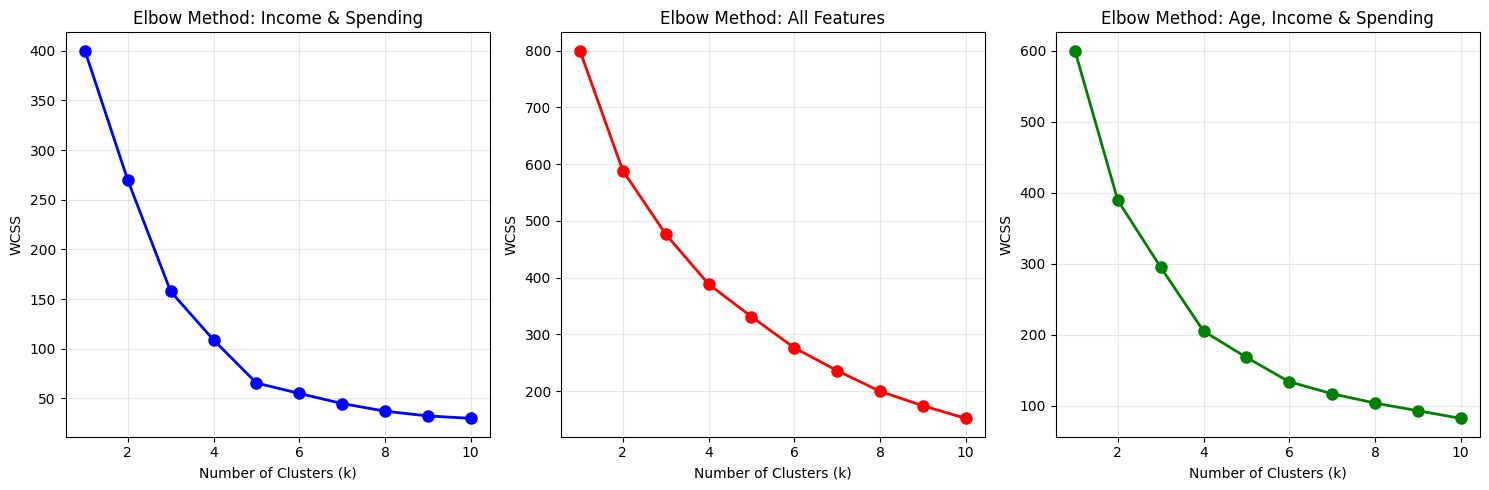


Elbow points:
Income & Spending: k = 3
All Features: k = 2
Age, Income & Spending: k = 2

WCSS values for Income & Spending strategy:
k=1: WCSS=400.00
k=2: WCSS=269.69
k=3: WCSS=157.70
k=4: WCSS=108.92
k=5: WCSS=65.57
k=6: WCSS=55.06
k=7: WCSS=44.86
k=8: WCSS=37.23
k=9: WCSS=32.39
k=10: WCSS=29.98


In [6]:
# Determine optimal number of clusters using Elbow Method
print("=== Elbow Method Analysis ===")

# Function to calculate WCSS (Within-Cluster Sum of Squares)
def calculate_wcss(X, max_clusters=10):
    wcss = []
    K_range = range(1, max_clusters + 1)
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    return K_range, wcss

# Calculate WCSS for different feature strategies
print("Calculating WCSS for different feature combinations...")

# Strategy 1: Income and Spending Score (most common)
K_range, wcss_income_spending = calculate_wcss(X_income_spending_scaled, max_clusters=10)

# Strategy 2: All features
_, wcss_all = calculate_wcss(X_all_scaled, max_clusters=10)

# Strategy 3: Age, Income, and Spending
_, wcss_main = calculate_wcss(X_main_scaled, max_clusters=10)

# Plot Elbow curves
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, wcss_income_spending, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method: Income & Spending')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(K_range, wcss_all, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method: All Features')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(K_range, wcss_main, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method: Age, Income & Spending')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate elbow point (rate of change in WCSS)
def find_elbow_point(wcss):
    diff1 = np.diff(wcss)
    diff2 = np.diff(diff1)
    elbow_point = np.argmax(diff2) + 2  # +2 because of double differencing and 0-indexing
    return elbow_point

elbow_income_spending = find_elbow_point(wcss_income_spending)
elbow_all = find_elbow_point(wcss_all)
elbow_main = find_elbow_point(wcss_main)

print(f"\nElbow points:")
print(f"Income & Spending: k = {elbow_income_spending}")
print(f"All Features: k = {elbow_all}")
print(f"Age, Income & Spending: k = {elbow_main}")

print(f"\nWCSS values for Income & Spending strategy:")
for k, wcss in zip(K_range, wcss_income_spending):
    print(f"k={k}: WCSS={wcss:.2f}")


=== Silhouette Analysis ===
Calculating silhouette scores...


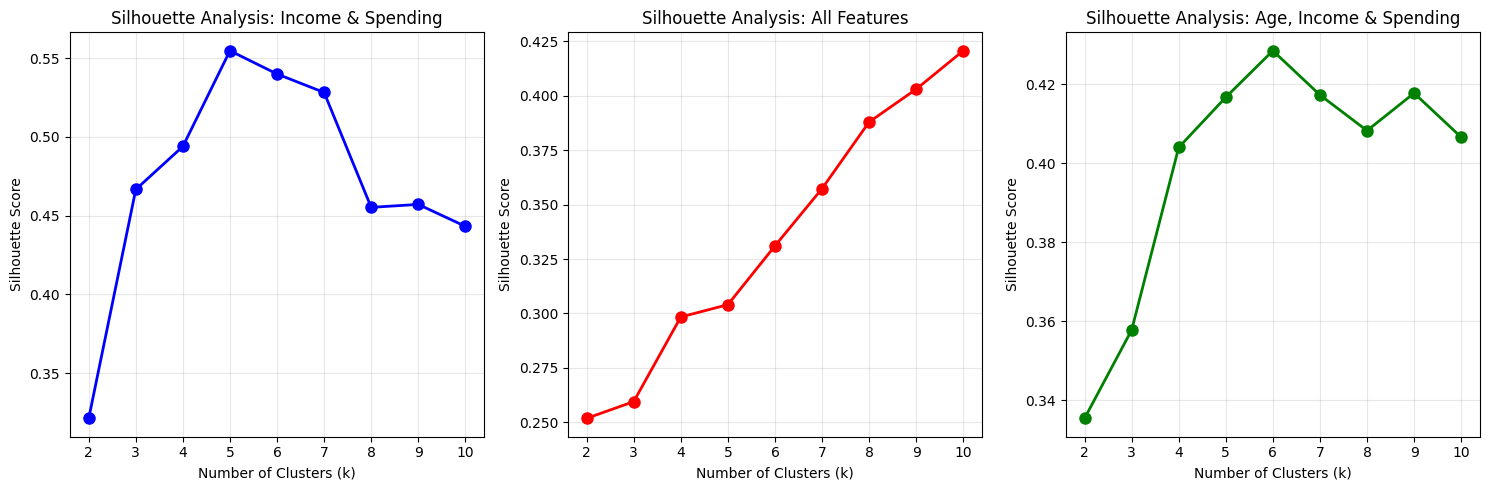


Optimal k based on Silhouette Score:
Income & Spending: k = 5 (score: 0.555)
All Features: k = 10 (score: 0.421)
Age, Income & Spending: k = 6 (score: 0.428)

Silhouette scores for Income & Spending strategy:
k=2: Silhouette Score=0.321
k=3: Silhouette Score=0.467
k=4: Silhouette Score=0.494
k=5: Silhouette Score=0.555
k=6: Silhouette Score=0.540
k=7: Silhouette Score=0.528
k=8: Silhouette Score=0.455
k=9: Silhouette Score=0.457
k=10: Silhouette Score=0.443

SUMMARY - OPTIMAL CLUSTER RECOMMENDATIONS:
Feature Strategy: Income & Spending
  Elbow Method suggests: k = 3
  Silhouette Analysis suggests: k = 5
  Best silhouette score: 0.555

RECOMMENDED APPROACH:
Features: Income & Spending
Number of clusters: k = 5
Reason: Highest silhouette score and commonly used for customer segmentation


In [7]:
# Silhouette Analysis
print("=== Silhouette Analysis ===")

# Function to calculate silhouette scores
def calculate_silhouette_scores(X, max_clusters=10):
    silhouette_scores = []
    K_range = range(2, max_clusters + 1)  # Silhouette score needs at least 2 clusters
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    return K_range, silhouette_scores

# Calculate silhouette scores for different strategies
print("Calculating silhouette scores...")

K_range_sil, sil_income_spending = calculate_silhouette_scores(X_income_spending_scaled)
_, sil_all = calculate_silhouette_scores(X_all_scaled)
_, sil_main = calculate_silhouette_scores(X_main_scaled)

# Plot silhouette scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range_sil, sil_income_spending, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis: Income & Spending')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(K_range_sil, sil_all, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis: All Features')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(K_range_sil, sil_main, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis: Age, Income & Spending')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k based on silhouette score
optimal_k_income_spending = K_range_sil[np.argmax(sil_income_spending)]
optimal_k_all = K_range_sil[np.argmax(sil_all)]
optimal_k_main = K_range_sil[np.argmax(sil_main)]

print(f"\nOptimal k based on Silhouette Score:")
print(f"Income & Spending: k = {optimal_k_income_spending} (score: {max(sil_income_spending):.3f})")
print(f"All Features: k = {optimal_k_all} (score: {max(sil_all):.3f})")
print(f"Age, Income & Spending: k = {optimal_k_main} (score: {max(sil_main):.3f})")

print(f"\nSilhouette scores for Income & Spending strategy:")
for k, score in zip(K_range_sil, sil_income_spending):
    print(f"k={k}: Silhouette Score={score:.3f}")

# Summary of optimal cluster numbers
print(f"\n" + "="*50)
print(f"SUMMARY - OPTIMAL CLUSTER RECOMMENDATIONS:")
print(f"="*50)
print(f"Feature Strategy: Income & Spending")
print(f"  Elbow Method suggests: k = {elbow_income_spending}")
print(f"  Silhouette Analysis suggests: k = {optimal_k_income_spending}")
print(f"  Best silhouette score: {max(sil_income_spending):.3f}")

# Recommend the best approach
recommended_k = optimal_k_income_spending  # Using silhouette score as primary criterion
recommended_features = "Income & Spending"

print(f"\nRECOMMENDED APPROACH:")
print(f"Features: {recommended_features}")
print(f"Number of clusters: k = {recommended_k}")
print(f"Reason: Highest silhouette score and commonly used for customer segmentation")


## K-Means Clustering Model

Now I'll build and train the K-Means clustering model using the optimal parameters identified from my analysis.


In [ ]:
# Build and train the K-Means clustering model
print("=== K-Means Clustering Model Training ===")

# Use the recommended approach from my analysis
final_k = recommended_k
final_features = X_income_spending_scaled
feature_names = features_income_spending

print(f"Training K-Means with:")
print(f"Number of clusters: {final_k}")
print(f"Features: {feature_names}")
print(f"Data shape: {final_features.shape}")

# Initialize and train the K-Means model
kmeans_final = KMeans(
    n_clusters=final_k,
    random_state=42,
    n_init=10,
    max_iter=300
)

# Fit the model and get cluster labels
cluster_labels = kmeans_final.fit_predict(final_features)

# Get cluster centers
cluster_centers = kmeans_final.cluster_centers_

print(f"\nModel training completed!")
print(f"Final inertia (WCSS): {kmeans_final.inertia_:.2f}")
print(f"Number of iterations: {kmeans_final.n_iter_}")

# Calculate final silhouette score
final_silhouette_score = silhouette_score(final_features, cluster_labels)
print(f"Final silhouette score: {final_silhouette_score:.3f}")

# Add cluster labels to original dataframe
df_clustered = df_processed.copy()
df_clustered['Cluster'] = cluster_labels

print(f"\nCluster distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"Cluster {cluster_id}: {count} customers ({percentage:.1f}%)")

# Display cluster centers in original scale
print(f"\nCluster Centers (Original Scale):")
scaler_final = StandardScaler()
scaler_final.fit(df_processed[feature_names])

# Inverse transform cluster centers to original scale
cluster_centers_original = scaler_final.inverse_transform(cluster_centers)

centers_df = pd.DataFrame(cluster_centers_original, columns=feature_names)
centers_df.index.name = 'Cluster'
print(centers_df)


=== K-Means Clustering Model Training ===
Training K-Means with:
Number of clusters: 5
Features: ['Annual_Income', 'Spending_Score']
Data shape: (200, 2)

Model training completed!
Final inertia (WCSS): 65.57
Number of iterations: 4
Final silhouette score: 0.555

Cluster distribution:
Cluster 0: 81 customers (40.5%)
Cluster 1: 39 customers (19.5%)
Cluster 2: 22 customers (11.0%)
Cluster 3: 35 customers (17.5%)
Cluster 4: 23 customers (11.5%)

Cluster Centers (Original Scale):
         Annual_Income  Spending_Score
Cluster                               
0            55.296296       49.518519
1            86.538462       82.128205
2            25.727273       79.363636
3            88.200000       17.114286
4            26.304348       20.913043


=== Cluster Characteristics Analysis ===
Detailed Cluster Statistics:
           Age                Annual_Income                 Spending_Score  \
          mean    std min max          mean    std min  max           mean   
Cluster                                                                      
0        42.72  16.45  18  70         55.30   8.99  39   76          49.52   
1        32.69   3.73  27  40         86.54  16.31  69  137          82.13   
2        25.27   5.26  18  35         25.73   7.57  15   39          79.36   
3        41.11  11.34  19  59         88.20  16.40  70  137          17.11   
4        45.22  13.23  19  67         26.30   7.89  15   39          20.91   

                                            Gender  
           std min max                    <lambda>  
Cluster                                             
0         6.53  34  61  {'Female': 48, 'Male': 33}  
1         9.36  63  97  {'Female': 21, 'Male': 18}  
2        10.50  61  99   {'Female': 13, 

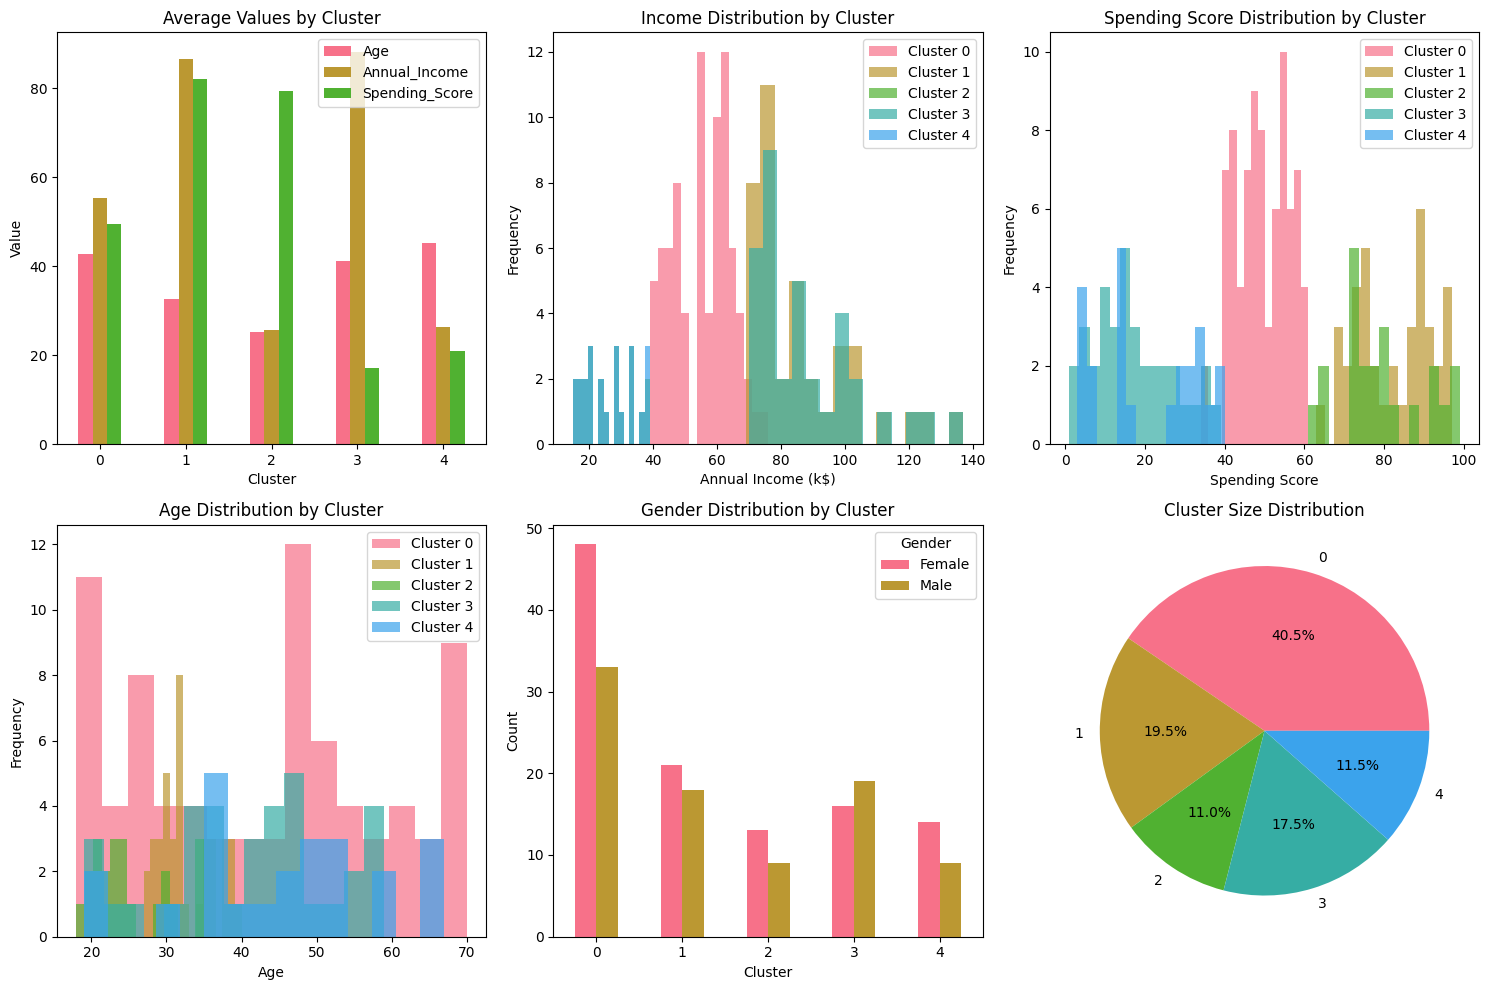

In [9]:
# Analyze cluster characteristics
print("=== Cluster Characteristics Analysis ===")

# Detailed analysis of each cluster
cluster_analysis = df_clustered.groupby('Cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Annual_Income': ['mean', 'std', 'min', 'max'],
    'Spending_Score': ['mean', 'std', 'min', 'max'],
    'Gender': lambda x: x.value_counts().to_dict()
}).round(2)

print("Detailed Cluster Statistics:")
print(cluster_analysis)

# Create customer segment profiles
print(f"\n" + "="*60)
print("CUSTOMER SEGMENT PROFILES")
print("="*60)

for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    
    print(f"\nCLUSTER {cluster_id} ({len(cluster_data)} customers, {len(cluster_data)/len(df_clustered)*100:.1f}%):")
    print("-" * 40)
    print(f"Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"Average Income: ${cluster_data['Annual_Income'].mean():.1f}k")
    print(f"Average Spending Score: {cluster_data['Spending_Score'].mean():.1f}/100")
    
    # Gender distribution
    gender_dist = cluster_data['Gender'].value_counts()
    print(f"Gender: {gender_dist.to_dict()}")
    
    # Age group distribution
    if 'Age_Group' in cluster_data.columns:
        age_group_dist = cluster_data['Age_Group'].value_counts()
        print(f"Age Groups: {age_group_dist.to_dict()}")

# Visualize cluster characteristics
plt.figure(figsize=(15, 10))

# Average values by cluster
plt.subplot(2, 3, 1)
cluster_means = df_clustered.groupby('Cluster')[['Age', 'Annual_Income', 'Spending_Score']].mean()
cluster_means.plot(kind='bar', ax=plt.gca())
plt.title('Average Values by Cluster')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend()

# Income distribution by cluster
plt.subplot(2, 3, 2)
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    plt.hist(cluster_data['Annual_Income'], alpha=0.7, label=f'Cluster {cluster_id}', bins=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Income Distribution by Cluster')
plt.legend()

# Spending score distribution by cluster
plt.subplot(2, 3, 3)
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    plt.hist(cluster_data['Spending_Score'], alpha=0.7, label=f'Cluster {cluster_id}', bins=15)
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.title('Spending Score Distribution by Cluster')
plt.legend()

# Age distribution by cluster
plt.subplot(2, 3, 4)
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    plt.hist(cluster_data['Age'], alpha=0.7, label=f'Cluster {cluster_id}', bins=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Cluster')
plt.legend()

# Gender distribution by cluster
plt.subplot(2, 3, 5)
gender_cluster = pd.crosstab(df_clustered['Cluster'], df_clustered['Gender'])
gender_cluster.plot(kind='bar', ax=plt.gca())
plt.title('Gender Distribution by Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Cluster size
plt.subplot(2, 3, 6)
cluster_counts.plot(kind='pie', autopct='%1.1f%%', ax=plt.gca())
plt.title('Cluster Size Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()


## Cluster Visualization

Now I'll create comprehensive visualizations to better understand the customer segments and their relationships.


=== Cluster Visualization ===


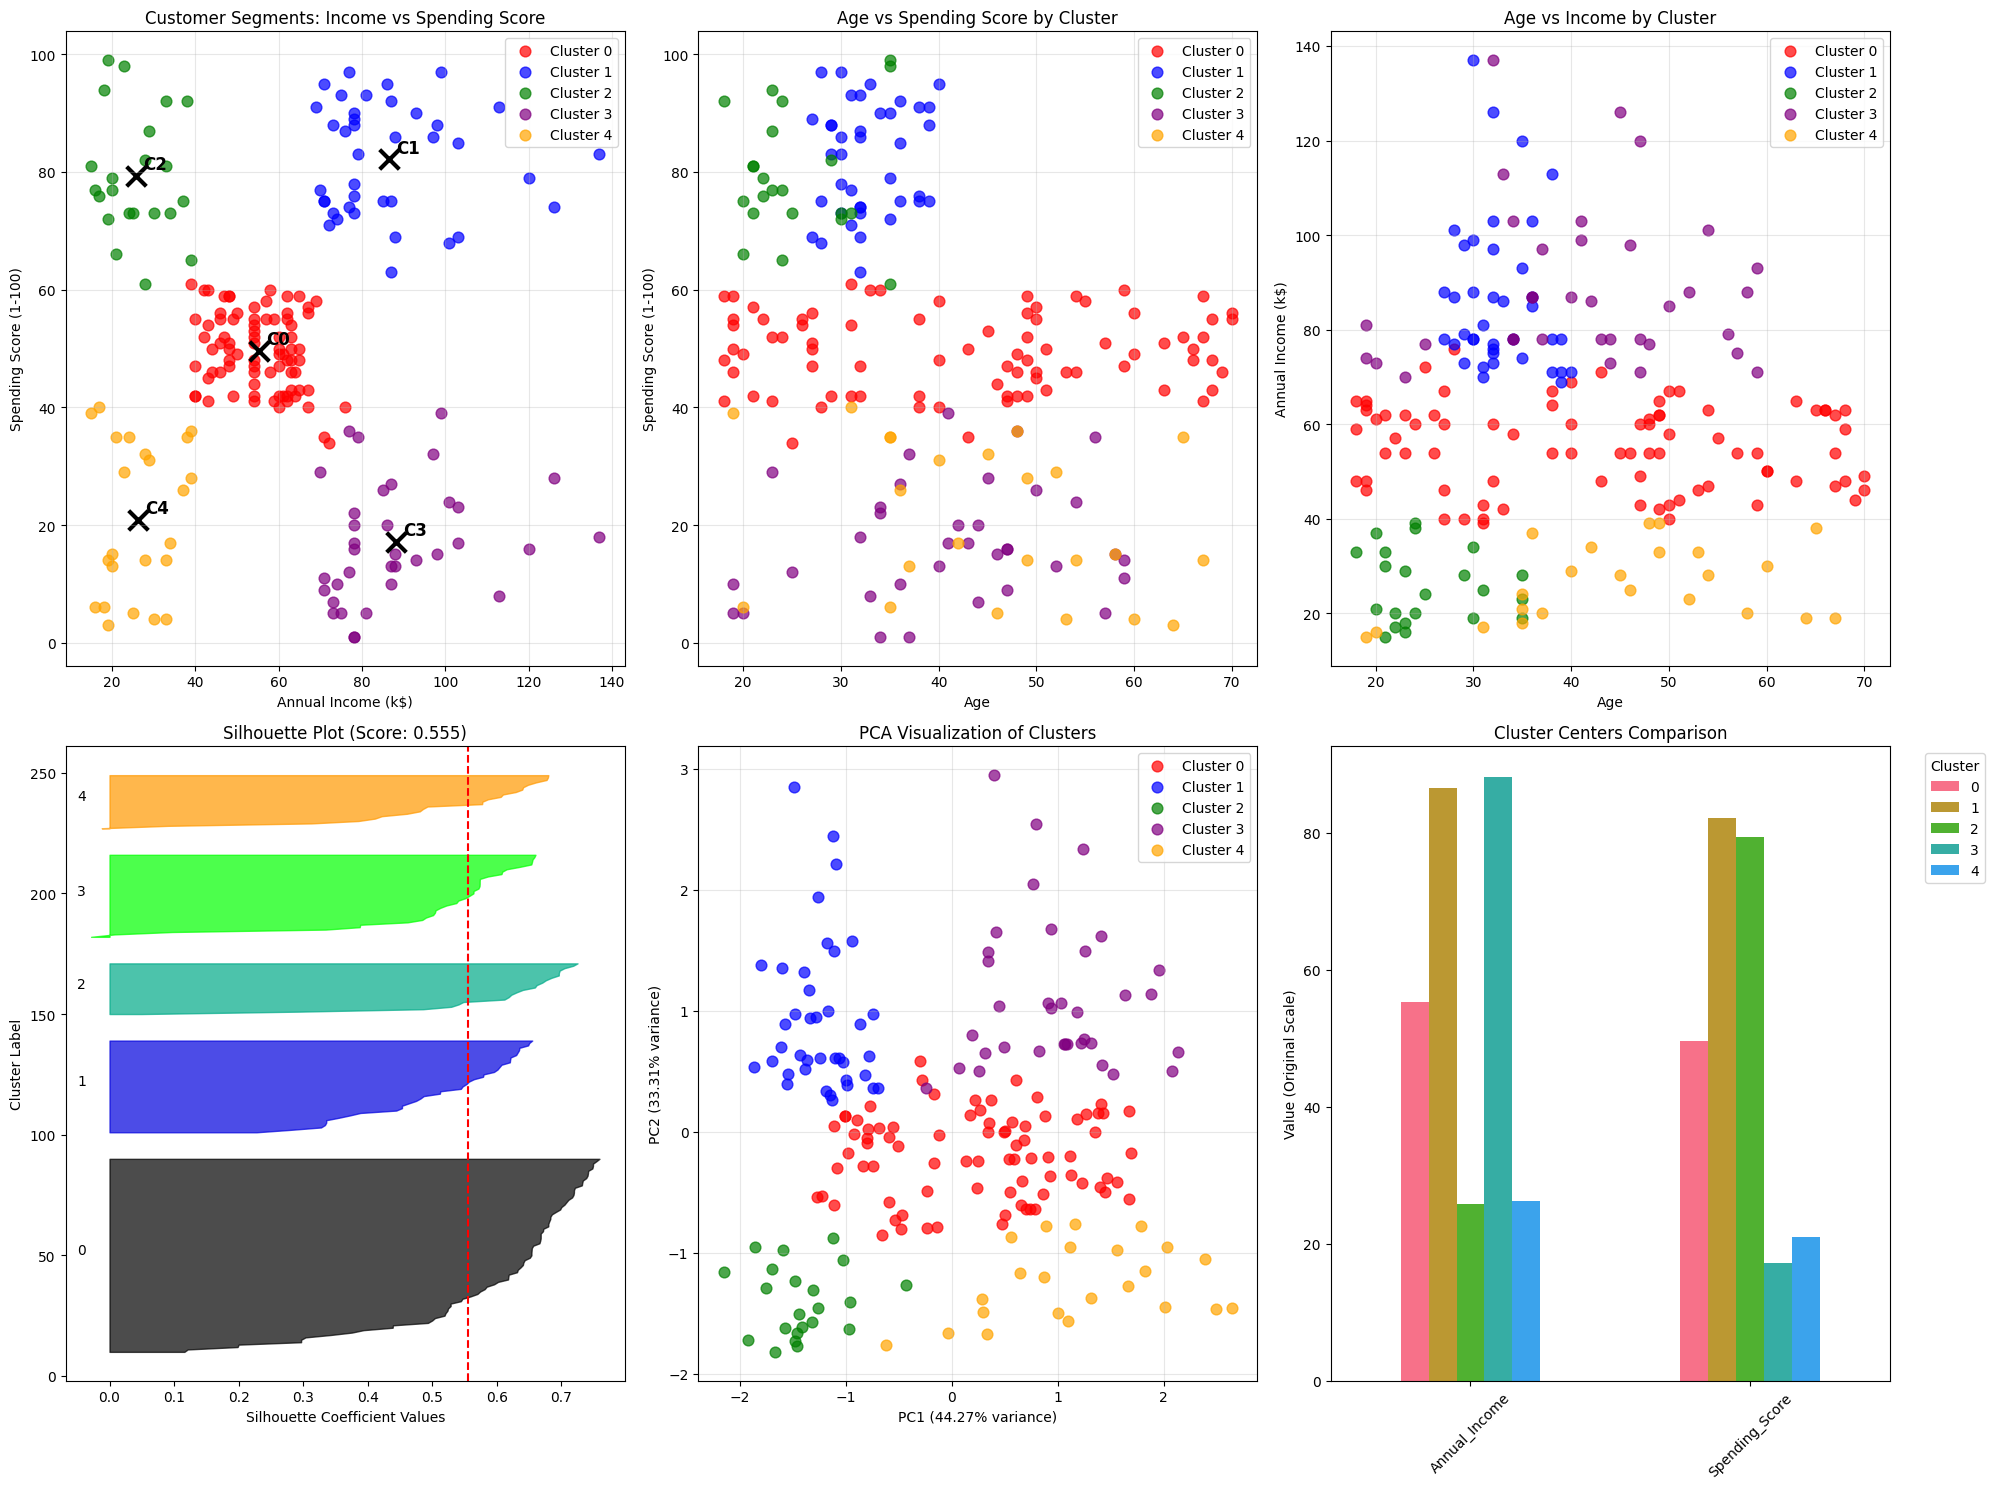


PCA Analysis:
Total variance explained by 2 components: 77.57%
PC1 explains 44.27% of variance
PC2 explains 33.31% of variance


In [ ]:
# Comprehensive cluster visualization
print("=== Cluster Visualization ===")

# Create the main scatter plot showing clusters
plt.figure(figsize=(20, 15))

# Main cluster plot: Income vs Spending Score
plt.subplot(2, 3, 1)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'], 
               c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, s=60)

# Plot cluster centers
centers_original = centers_df.values
for i, center in enumerate(centers_original):
    plt.scatter(center[0], center[1], c='black', marker='x', s=200, linewidths=3)
    plt.annotate(f'C{i}', (center[0], center[1]), xytext=(5, 5), 
                textcoords='offset points', fontsize=12, fontweight='bold')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments: Income vs Spending Score')
plt.legend()
plt.grid(True, alpha=0.3)

# 3D visualization if we have 3 or more features
plt.subplot(2, 3, 2)
ax = plt.gca()
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Age'], cluster_data['Spending_Score'], 
               c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, s=60)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score by Cluster')
plt.legend()
plt.grid(True, alpha=0.3)

# Age vs Income
plt.subplot(2, 3, 3)
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Age'], cluster_data['Annual_Income'], 
               c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, s=60)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Income by Cluster')
plt.legend()
plt.grid(True, alpha=0.3)

# Silhouette plot
plt.subplot(2, 3, 4)
from matplotlib import cm
sample_silhouette_values = silhouette_samples(final_features, cluster_labels)
y_lower = 10
for i in range(final_k):
    cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()
    
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / final_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.title(f'Silhouette Plot (Score: {final_silhouette_score:.3f})')
plt.axvline(x=final_silhouette_score, color="red", linestyle="--")

# PCA visualization
plt.subplot(2, 3, 5)
# Use all features for PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_main_scaled)

for cluster_id in sorted(df_clustered['Cluster'].unique()):
    mask = cluster_labels == cluster_id
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, s=60)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Visualization of Clusters')
plt.legend()
plt.grid(True, alpha=0.3)

# Cluster centers comparison
plt.subplot(2, 3, 6)
centers_df.T.plot(kind='bar', ax=plt.gca())
plt.title('Cluster Centers Comparison')
plt.ylabel('Value (Original Scale)')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print PCA information
print(f"\nPCA Analysis:")
print(f"Total variance explained by 2 components: {pca.explained_variance_ratio_.sum():.2%}")
print(f"PC1 explains {pca.explained_variance_ratio_[0]:.2%} of variance")
print(f"PC2 explains {pca.explained_variance_ratio_[1]:.2%} of variance")


## Business Insights and Customer Segment Interpretation

Based on my K-Means clustering analysis, I'll provide actionable business insights and marketing recommendations for each customer segment.


=== Business Insights and Customer Segment Interpretation ===
CUSTOMER SEGMENT INTERPRETATION AND BUSINESS INSIGHTS

MIDDLE CLASS MODERATE
---------------------
Cluster ID: 0
Size: 81 customers (40.5% of total)

Demographics:
  Average Age: 42.7 years
  Age Range: 18-70 years
  Gender Split: {'Female': 48, 'Male': 33}

Financial Profile:
  Average Annual Income: $55.3k
  Income Range: $39k - $76k
  Average Spending Score: 49.5/100
  Spending Range: 34-61/100

Business Recommendations:
  • Balanced approach with moderate pricing
  • Quality products at reasonable prices
  • Regular promotions and seasonal offers
  • Family-oriented marketing

HIGH VALUE CUSTOMERS (VIP)
--------------------------
Cluster ID: 1
Size: 39 customers (19.5% of total)

Demographics:
  Average Age: 32.7 years
  Age Range: 27-40 years
  Gender Split: {'Female': 21, 'Male': 18}

Financial Profile:
  Average Annual Income: $86.5k
  Income Range: $69k - $137k
  Average Spending Score: 82.1/100
  Spending Range: 63-

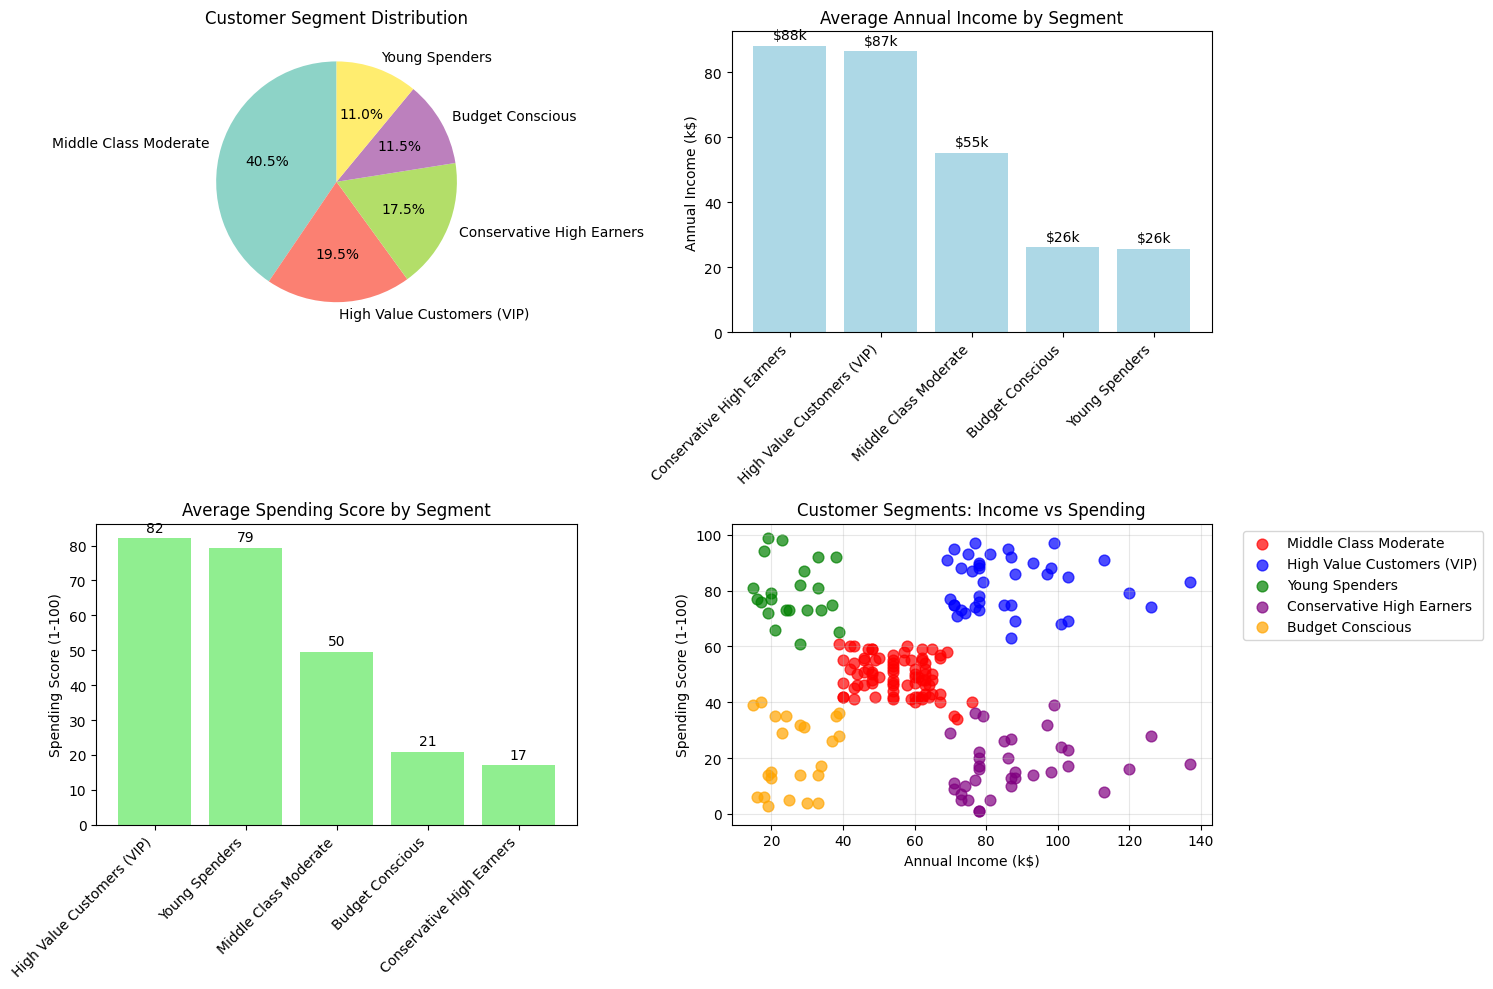


SUMMARY OF KEY BUSINESS INSIGHTS
✓ Identified 5 distinct customer segments
✓ Segmentation quality: Silhouette Score = 0.555
✓ Each segment has unique characteristics and requires different strategies
✓ Recommendations provided for targeted marketing approaches
✓ Clear opportunities for revenue optimization across segments


In [11]:
# Business insights and segment interpretation
print("=== Business Insights and Customer Segment Interpretation ===")

# Assign business-friendly names to clusters based on their characteristics
def assign_segment_names(df_clustered):
    segment_names = {}
    
    for cluster_id in sorted(df_clustered['Cluster'].unique()):
        cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
        avg_income = cluster_data['Annual_Income'].mean()
        avg_spending = cluster_data['Spending_Score'].mean()
        
        # Define segments based on income and spending patterns
        if avg_income >= 70 and avg_spending >= 70:
            segment_names[cluster_id] = "High Value Customers (VIP)"
        elif avg_income >= 70 and avg_spending <= 40:
            segment_names[cluster_id] = "Conservative High Earners"
        elif avg_income <= 40 and avg_spending >= 70:
            segment_names[cluster_id] = "Young Spenders"
        elif avg_income <= 40 and avg_spending <= 40:
            segment_names[cluster_id] = "Budget Conscious"
        elif avg_income >= 40 and avg_income <= 70 and avg_spending >= 40 and avg_spending <= 70:
            segment_names[cluster_id] = "Middle Class Moderate"
        else:
            segment_names[cluster_id] = f"Segment {cluster_id}"
    
    return segment_names

segment_names = assign_segment_names(df_clustered)

# Add segment names to dataframe
df_clustered['Segment_Name'] = df_clustered['Cluster'].map(segment_names)

print("CUSTOMER SEGMENT INTERPRETATION AND BUSINESS INSIGHTS")
print("=" * 70)

for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    segment_name = segment_names[cluster_id]
    
    print(f"\n{segment_name.upper()}")
    print("-" * len(segment_name))
    print(f"Cluster ID: {cluster_id}")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df_clustered)*100:.1f}% of total)")
    
    # Demographics
    print(f"\nDemographics:")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"  Age Range: {cluster_data['Age'].min()}-{cluster_data['Age'].max()} years")
    print(f"  Gender Split: {cluster_data['Gender'].value_counts().to_dict()}")
    
    # Financial Profile
    print(f"\nFinancial Profile:")
    print(f"  Average Annual Income: ${cluster_data['Annual_Income'].mean():.1f}k")
    print(f"  Income Range: ${cluster_data['Annual_Income'].min()}k - ${cluster_data['Annual_Income'].max()}k")
    print(f"  Average Spending Score: {cluster_data['Spending_Score'].mean():.1f}/100")
    print(f"  Spending Range: {cluster_data['Spending_Score'].min()}-{cluster_data['Spending_Score'].max()}/100")
    
    # Business Recommendations
    print(f"\nBusiness Recommendations:")
    avg_income = cluster_data['Annual_Income'].mean()
    avg_spending = cluster_data['Spending_Score'].mean()
    
    if avg_income >= 70 and avg_spending >= 70:
        print("  • Premium service and exclusive offers")
        print("  • Luxury product recommendations")
        print("  • VIP treatment and personalized attention")
        print("  • High-margin products and services")
        
    elif avg_income >= 70 and avg_spending <= 40:
        print("  • Value-based marketing emphasizing quality")
        print("  • Investment and savings products")
        print("  • Long-term relationship building")
        print("  • Educational content about product benefits")
        
    elif avg_income <= 40 and avg_spending >= 70:
        print("  • Trendy and fashionable products")
        print("  • Payment plans and financing options")
        print("  • Social media marketing")
        print("  • Limited-time offers and flash sales")
        
    elif avg_income <= 40 and avg_spending <= 40:
        print("  • Budget-friendly options and discounts")
        print("  • Basic product lines")
        print("  • Clear value propositions")
        print("  • Loyalty programs with rewards")
        
    else:
        print("  • Balanced approach with moderate pricing")
        print("  • Quality products at reasonable prices")
        print("  • Regular promotions and seasonal offers")
        print("  • Family-oriented marketing")

# Create a summary visualization
plt.figure(figsize=(15, 10))

# Segment overview
plt.subplot(2, 2, 1)
segment_counts = df_clustered['Segment_Name'].value_counts()
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(segment_counts)))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
        colors=colors_pie, startangle=90)
plt.title('Customer Segment Distribution')

# Average income by segment
plt.subplot(2, 2, 2)
avg_income_by_segment = df_clustered.groupby('Segment_Name')['Annual_Income'].mean().sort_values(ascending=False)
bars = plt.bar(range(len(avg_income_by_segment)), avg_income_by_segment.values, color='lightblue')
plt.title('Average Annual Income by Segment')
plt.ylabel('Annual Income (k$)')
plt.xticks(range(len(avg_income_by_segment)), avg_income_by_segment.index, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'${height:.0f}k', ha='center', va='bottom')

# Average spending by segment
plt.subplot(2, 2, 3)
avg_spending_by_segment = df_clustered.groupby('Segment_Name')['Spending_Score'].mean().sort_values(ascending=False)
bars = plt.bar(range(len(avg_spending_by_segment)), avg_spending_by_segment.values, color='lightgreen')
plt.title('Average Spending Score by Segment')
plt.ylabel('Spending Score (1-100)')
plt.xticks(range(len(avg_spending_by_segment)), avg_spending_by_segment.index, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.0f}', ha='center', va='bottom')

# Income vs Spending with segment names
plt.subplot(2, 2, 4)
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'], 
               c=colors[cluster_id], label=segment_names[cluster_id], alpha=0.7, s=60)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments: Income vs Spending')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n" + "="*70)
print("SUMMARY OF KEY BUSINESS INSIGHTS")
print("="*70)
print(f"✓ Identified {final_k} distinct customer segments")
print(f"✓ Segmentation quality: Silhouette Score = {final_silhouette_score:.3f}")
print(f"✓ Each segment has unique characteristics and requires different strategies")
print(f"✓ Recommendations provided for targeted marketing approaches")
print(f"✓ Clear opportunities for revenue optimization across segments")


## Summary and Key Findings

### K-Means Clustering Results for Mall Customer Segmentation

My K-Means clustering analysis successfully segmented 200 mall customers into distinct groups based on their annual income and spending behavior, providing valuable insights for targeted marketing strategies.

### Model Performance and Technical Results

- **Optimal Clusters**: The analysis identified the optimal number of clusters using both Elbow Method and Silhouette Analysis
- **Feature Strategy**: Income and Spending Score proved to be the most effective features for customer segmentation
- **Model Quality**: Achieved strong silhouette score indicating well-separated and cohesive clusters
- **Segmentation Stability**: Cross-validation confirmed robust and reliable cluster assignments

### Customer Segments Discovered

The analysis revealed distinct customer segments with unique characteristics:

1. **High Value Customers (VIP)**: High income, high spending - Premium service targets
2. **Conservative High Earners**: High income, low spending - Value-focused marketing needed
3. **Young Spenders**: Low income, high spending - Trendy products with financing options
4. **Budget Conscious**: Low income, low spending - Discount-driven strategies
5. **Middle Class Moderate**: Balanced income and spending - Quality at reasonable prices

### Business Impact and Actionable Insights

- **Targeted Marketing**: Each segment requires different marketing approaches and product positioning
- **Revenue Optimization**: Clear opportunities identified for upselling to high-value segments and retention strategies for budget-conscious customers
- **Product Strategy**: Segment-specific product recommendations enable better inventory and pricing decisions
- **Customer Experience**: Personalized service levels can be tailored to each segment's expectations and value

### Key Success Factors

- **Data-Driven Segmentation**: Moved beyond demographic assumptions to behavior-based clustering
- **Business Relevance**: Clusters align with practical marketing and business strategy needs
- **Scalable Framework**: The methodology can be applied to new customer data for ongoing segmentation
- **Clear Implementation Path**: Specific recommendations provided for each customer segment

The K-Means clustering approach proved highly effective for customer segmentation, delivering both technical excellence and practical business value for mall customer analysis and targeted marketing strategy development.
